In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6

In [27]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
demand_data = pd.read_csv('./data/DemandaInfo.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)
demand_ts = demand_data['demand']

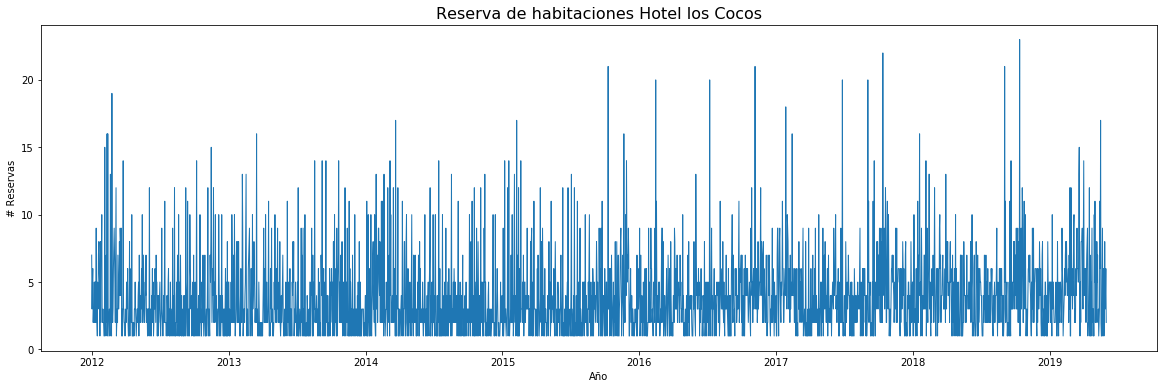

In [28]:
#Plot
plt.plot(demand_ts, linewidth=1)
plt.title(u'Reserva de habitaciones Hotel los Cocos', fontsize=16)
plt.ylabel(u'# Reservas')
plt.xlabel(u'Año')
plt.show()

In [29]:
#demand_ts['2012':'2018']

In [30]:
TS = np.array(demand_ts)
num_periods = 182
f_horizon = 1
x_data = TS[:(len(TS)-(len(TS)% num_periods))]
x_batches = x_data.reshape(-1, 1, 1)

y_data = TS[1:(len(TS)-(len(TS) % num_periods)) + f_horizon]
y_batches = y_data.reshape(-1, 1, 1)

In [31]:
#TS

In [32]:
print("x_data:")
#print(x_data)

print("\n x_batches:")
#print(x_batches)
print("\n x_batches shape:")
print(x_batches.shape)

print("\n y_data]:")
#print(y_data)

print("\n y_batches:")
#print(y_batches)
print("\n y_batches shape:")
print(y_batches.shape)

x_data:

 x_batches:

 x_batches shape:
(2548, 1, 1)

 y_data]:

 y_batches:

 y_batches shape:
(2548, 1, 1)


In [33]:
def test_data(series, forecast, num_periods):
    test_x_setup = TS[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, 1, 1)
    testY = TS[-(num_periods):].reshape(-1, 1, 1)
    return testX,testY

X_test, Y_test = test_data(TS, f_horizon, num_periods)

print("\n X_test shape")
print(X_test.shape)

print("\n Y_test shape")
print(Y_test.shape)

print("\n X_test")
#print(X_test)


 X_test shape
(182, 1, 1)

 Y_test shape
(182, 1, 1)

 X_test


In [36]:
tf.reset_default_graph()

num_periods = 1
inputs = 1
hidden = 300
output = 1

X = tf.placeholder(tf.float32, [None, num_periods, inputs])
y = tf.placeholder(tf.float32, [None, num_periods, output])

basic_cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

#BasicRNNCell
#BasicLSTMCell
learning_rate = 0.001

stacked_rnn_output = tf.reshape(rnn_output,[-1,hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])


loss = tf.reduce_sum(tf.square(outputs - y ))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [37]:
epochs = 2000

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(ep, "\tMSE:", mse)
    y_pred = sess.run(outputs, feed_dict={X: X_test})

0 	MSE: 61144.16
100 	MSE: 37756.164
200 	MSE: 26825.498
300 	MSE: 24153.361
400 	MSE: 23701.773
500 	MSE: 23491.244
600 	MSE: 23379.945
700 	MSE: 23320.365
800 	MSE: 23280.135
900 	MSE: 23249.154
1000 	MSE: 23224.709
1100 	MSE: 23205.795
1200 	MSE: 23191.664
1300 	MSE: 23181.514
1400 	MSE: 23174.365
1500 	MSE: 23169.314
1600 	MSE: 23165.615
1700 	MSE: 23162.717
1800 	MSE: 23160.293
1900 	MSE: 23158.148


In [38]:
#indDates1 = pd.date_range(start = '2012-01-01', periods=366, freq='D')
indDates2 = pd.date_range(start = '2019-01-01', periods=len(Y_test), freq='D')


In [39]:
#Xtest = pd.DataFrame(X_test.ravel(), index=indDates1)
#Xtest

In [40]:
Ytest = pd.DataFrame(Y_test.ravel(), index=indDates2)
#Ytest

In [41]:
YPred = pd.DataFrame(y_pred.ravel(), index=indDates2)
#YPred

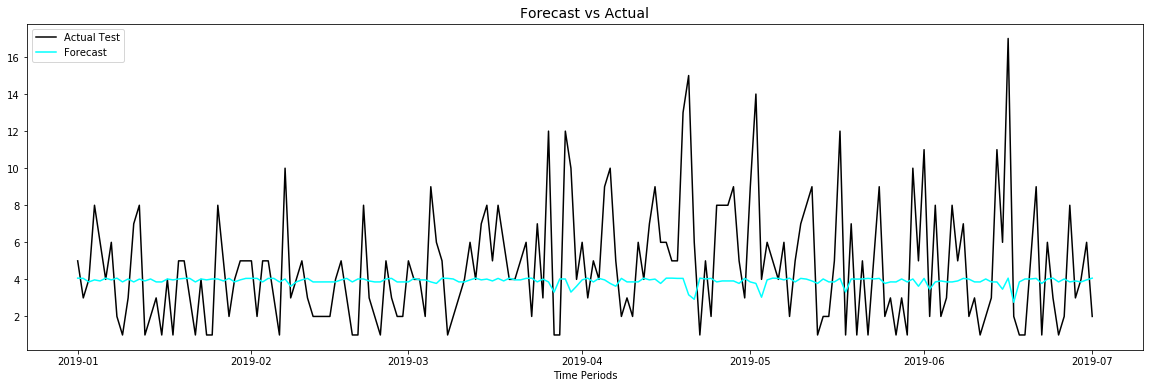

In [42]:
plt.title("Forecast vs Actual", fontsize=14)
#plt.plot( Xtest, 'blue', label="X Test")
plt.plot( Ytest, 'black', label="Actual Test")
plt.plot( YPred, 'cyan', label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")

plt.show()

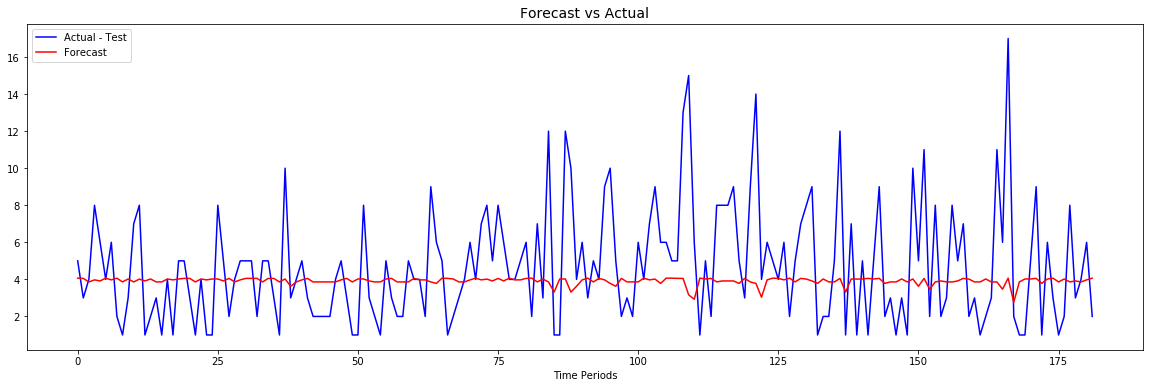

In [43]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), 'b', label="Actual - Test")
plt.plot(pd.Series(np.ravel(y_pred)), 'r', label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")

plt.show()

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [45]:
mean_absolute_percentage_error(Y_test,y_pred )

79.10139649186134

In [47]:
pd.set_option('display.max_columns', 3000)
pd.options.display.max_columns = 1600
pd.options.display.max_rows = 160

In [48]:
YPred

0
2019-01-01  4.066134
2019-01-02  4.053468
2019-01-03  3.861289
2019-01-04  3.972834
2019-01-05  3.915635
2019-01-06  4.066134
2019-01-07  3.972834
2019-01-08  4.066134
2019-01-09  3.863567
2019-01-10  4.022033
2019-01-11  3.861289
2019-01-12  4.015458
2019-01-13  3.915635
2019-01-14  4.022033
2019-01-15  3.863567
2019-01-16  3.861289
2019-01-17  4.022033
2019-01-18  3.972834
2019-01-19  4.022033
2019-01-20  4.053468
2019-01-21  4.053468
2019-01-22  3.861289
2019-01-23  4.022033
2019-01-24  3.972834
2019-01-25  4.022033
2019-01-26  4.022033
2019-01-27  3.915635
2019-01-28  4.053468
2019-01-29  3.863567
2019-01-30  3.972834
2019-01-31  4.053468
2019-02-01  4.053468
2019-02-02  4.053468
2019-02-03  3.863567
2019-02-04  4.053468
2019-02-05  4.053468
2019-02-06  3.861289
2019-02-07  4.022033
2019-02-08  3.629557
2019-02-09  3.861289
2019-02-10  3.972834
2019-02-11  4.053468
2019-02-12  3.861289
2019-02-13  3.863567
2019-02-14  3.863567
2019-02-15  3.863567
2019-02-16  3.863567
2019-02-17  3.972834
2019-02-18  4.053468
2019-02-19  3.861289
2019-02-20  4.022033
2019-02-21  4.022033
2019-02-22  3.915635
2019-02-23  3.861289
2019-02-24  3.863567
2019-02-25  4.022033
2019-02-26  4.053468
2019-02-27  3.861289
2019-02-28  3.863567
2019-03-01  3.863567
2019-03-02  4.053468
2019-03-03  3.972834
2019-03-04  3.972834
2019-03-05  3.863567
2019-03-06  3.782199
2019-03-07  4.066134
2019-03-08  4.053468
2019-03-09  4.022033
2019-03-10  3.863567
2019-03-11  3.861289
2019-03-12  3.972834
2019-03-13  4.066134
2019-03-14  3.972834
2019-03-15  4.015458
2019-03-16  3.915635
2019-03-17  4.053468
2019-03-18  3.915635
2019-03-19  4.066134
2019-03-20  3.972834
2019-03-21  3.972834
...              ...
2019-04-13  3.972834
2019-04-14  4.015458
2019-04-15  3.782199
2019-04-16  4.066134
2019-04-17  4.066134
2019-04-18  4.053468
2019-04-19  4.053468
2019-04-20  3.167403
2019-04-21  2.925654
2019-04-22  4.066134
2019-04-23  4.022033
2019-04-24  4.053468
2019-04-25  3.863567
2019-04-26  3.915635
2019-04-27  3.915635
2019-04-28  3.915635
2019-04-29  3.782199
2019-04-30  4.053468
2019-05-01  3.861289
2019-05-02  3.782199
2019-05-03  3.037009
2019-05-04  3.972834
2019-05-05  4.066134
2019-05-06  4.053468
2019-05-07  3.972834
2019-05-08  4.066134
2019-05-09  3.863567
2019-05-10  4.053468
2019-05-11  4.015458
2019-05-12  3.915635
2019-05-13  3.782199
2019-05-14  4.022033
2019-05-15  3.863567
2019-05-16  3.863567
2019-05-17  4.053468
2019-05-18  3.313489
2019-05-19  4.022033
2019-05-20  4.015458
2019-05-21  4.022033
2019-05-22  4.053468
2019-05-23  4.022033
2019-05-24  4.053468
2019-05-25  3.782199
2019-05-26  3.863567
2019-05-27  3.861289
2019-05-28  4.022033
2019-05-29  3.861289
2019-05-30  4.022033
2019-05-31  3.629557
2019-06-01  4.053468
2019-06-02  3.470026
2019-06-03  3.863567
2019-06-04  3.915635
2019-06-05  3.863567
2019-06-06  3.861289
2019-06-07  3.915635
2019-06-08  4.053468
2019-06-09  4.015458
2019-06-10  3.863567
2019-06-11  3.861289
2019-06-12  4.022033
2019-06-13  3.863567
2019-06-14  3.861289
2019-06-15  3.470026
2019-06-16  4.066134
2019-06-17  2.766128
2019-06-18  3.863567
2019-06-19  4.022033
2019-06-20  4.022033
2019-06-21  4.053468
2019-06-22  3.782199
2019-06-23  4.022033
2019-06-24  4.066134
2019-06-25  3.861289
2019-06-26  4.022033
2019-06-27  3.863567
2019-06-28  3.915635
2019-06-29  3.861289
2019-06-30  3.972834
2019-07-01  4.066134

[182 rows x 1 columns]